In [ ]:
6#To Download the github repo to colab env
!git clone https://gitfront.io/r/user-8948418/7v8eAoZ77xBD/KPTPACE-DLCV-Workshop.gitfront.git

fatal: destination path 'KPTPACE-DLCV-Workshop.gitfront' already exists and is not an empty directory.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks"

In [1]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image 
from IPython.display import Image
%matplotlib inline

In [ ]:


def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

# **`BLURRRING THE IMAGE`**


> Please upload "mad.jpg","shock.jpg" and "smile.jpg"



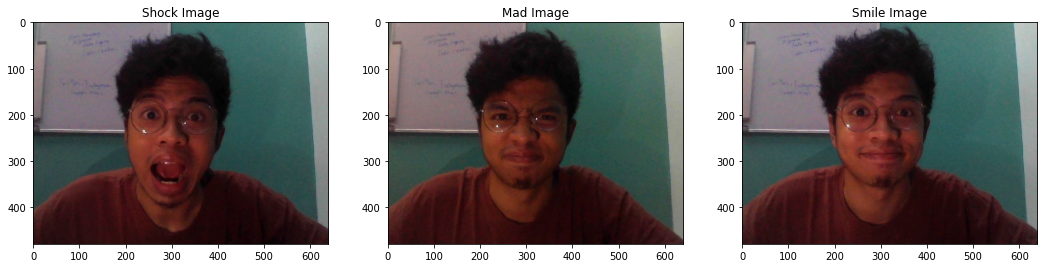

In [2]:
#open image
shock_img = cv2.imread("shock.jpg",1)
smile_img = cv2.imread("smile.jpg",1)
mad_img = cv2.imread("mad.jpg",1) 

#convert images to RGB
shock_img = cv2.cvtColor(shock_img,cv2.COLOR_BGR2RGB)
mad_img = cv2.cvtColor(mad_img,cv2.COLOR_BGR2RGB)
smile_img = cv2.cvtColor(smile_img,cv2.COLOR_BGR2RGB)

#image for blur
shock_img_blur = np.copy(shock_img)
mad_img_blur = np.copy(mad_img)
smile_img_blur = np.copy(smile_img)

#image for edge detection
shock_img_eg = np.copy(shock_img)
mad_img_eg = np.copy(mad_img)
smile_img_eg = np.copy(smile_img)

#display images
plt.figure(figsize=[18,5])
plt.subplot(131);plt.imshow(shock_img);plt.title("Shock Image");
plt.subplot(132);plt.imshow(mad_img);plt.title("Mad Image");
plt.subplot(133);plt.imshow(smile_img);plt.title("Smile Image");

In [3]:
kernel = np.ones((3,3), np.float32)/9 # box filter

In [4]:
def displayImage(image):
    if len(image.shape)==3:
        color_coverted = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(color_coverted)
        plt.show()
        
    else:
        plt.imshow(image, cmap="gray")
        plt.show()

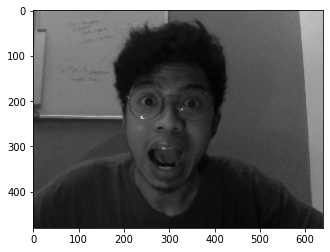

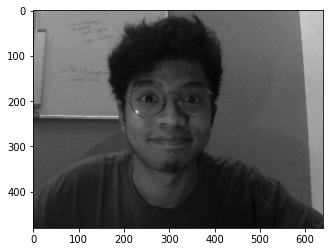

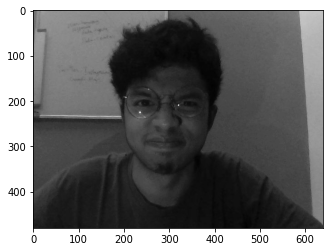

In [5]:
shock_img_gray = cv2.cvtColor(shock_img,cv2.COLOR_RGB2GRAY)
smile_img_gray = cv2.cvtColor(smile_img,cv2.COLOR_RGB2GRAY)
mad_img_gray = cv2.cvtColor(mad_img,cv2.COLOR_RGB2GRAY)

displayImage(shock_img_gray)
displayImage(smile_img_gray)
displayImage(mad_img_gray)

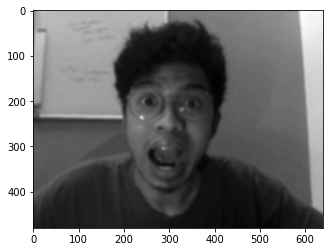

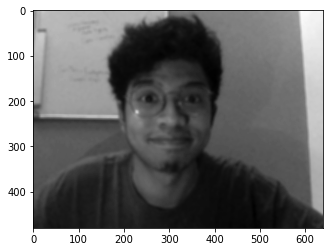

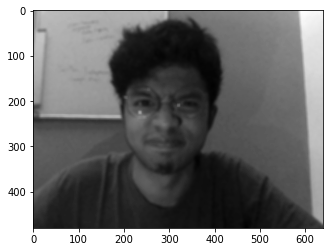

In [6]:
shock_blur = cv2.GaussianBlur(shock_img_gray,(7,7),10)
smile_blur = cv2.GaussianBlur(smile_img_gray,(7,7),10)
mad_blur = cv2.GaussianBlur(mad_img_gray,(7,7),10)
displayImage(shock_blur)
displayImage(smile_blur)
displayImage(mad_blur)

CANNY EDGE DETECTION

In [7]:
# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))
shock_img_box = face_cascade.detectMultiScale(shock_img)
smile_img_box = face_cascade.detectMultiScale(smile_img)
mad_img_box = face_cascade.detectMultiScale(mad_img)

#blur image
for face in shock_img_box:
  x,y,w,h = face
  mad_img_blur[y:y+h,x:x+w] = cv2.GaussianBlur(mad_img_blur[y:y+h,x:x+w],(7,7),cv2.BORDER_DEFAULT)
  cv2.rectangle(mad_img_blur,(x,y),(x+w,y+h),(255,0,0),2)
  shock_img_blur[y:y+h,x:x+w] = cv2.GaussianBlur(shock_img_blur[y:y+h,x:x+w],(7,7),cv2.BORDER_DEFAULT)
  cv2.rectangle(shock_img_blur,(x,y),(x+w,y+h),(255,0,0),2)
  smile_img_blur[y:y+h,x:x+w] = cv2.GaussianBlur(smile_img_blur[y:y+h,x:x+w],(7,7),cv2.BORDER_DEFAULT)
  cv2.rectangle(smile_img_blur,(x,y),(x+w,y+h),(255,0,0),2)

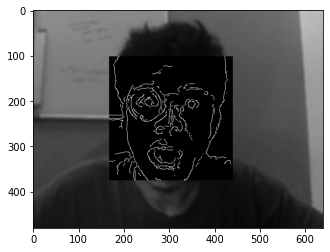

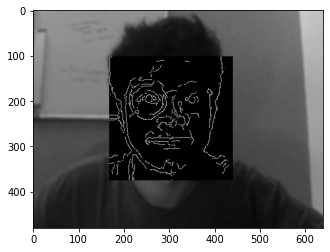

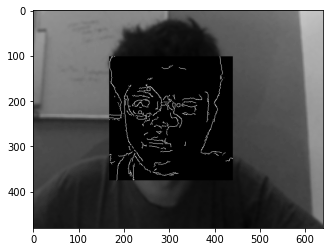

In [8]:
shock_blur[y:y+h,x:x+w] = cv2.Canny(shock_blur[y:y+h,x:x+w],1,30)
smile_blur[y:y+h,x:x+w] = cv2.Canny(smile_blur[y:y+h,x:x+w],1,30)
mad_blur[y:y+h,x:x+w] = cv2.Canny(mad_blur[y:y+h,x:x+w],1,30)
displayImage(shock_blur)
displayImage(smile_blur)
displayImage(mad_blur)


SOBEL EDGE DETECTION

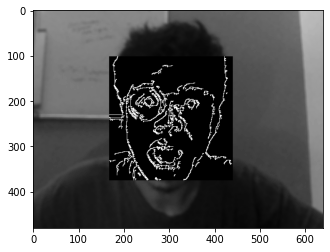

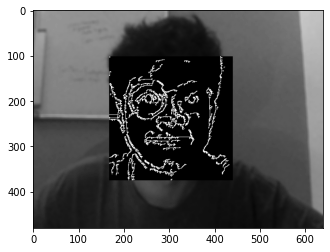

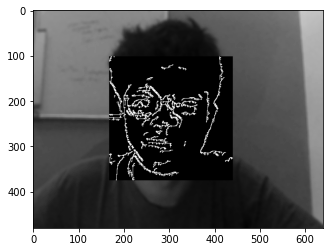

In [9]:
#shock
shocksobelx = cv2.Sobel(shock_blur[y:y+h,x:x+w], cv2.CV_8U,1,0,ksize=3)
shocksobely = cv2.Sobel(shock_blur[y:y+h,x:x+w], cv2.CV_8U,0,1,ksize=3)
shock_blur[y:y+h,x:x+w] = shocksobelx + shocksobely

#smile
smilesobelx = cv2.Sobel(smile_blur[y:y+h,x:x+w], cv2.CV_8U,1,0,ksize=3)
smilesobely = cv2.Sobel(smile_blur[y:y+h,x:x+w], cv2.CV_8U,0,1,ksize=3)
smile_blur[y:y+h,x:x+w] = smilesobelx + smilesobely

#mad
madsobelx = cv2.Sobel(mad_blur[y:y+h,x:x+w], cv2.CV_8U,1,0,ksize=3)
madsobely = cv2.Sobel(mad_blur[y:y+h,x:x+w], cv2.CV_8U,0,1,ksize=3)
mad_blur[y:y+h,x:x+w] = madsobelx + madsobely


displayImage(shock_blur)
displayImage(smile_blur)
displayImage(mad_blur)


In [ ]:
#plt.rcParams["figure.figsize"] = (10,8)
#get face bounding box coordinates using Haar Cascade
# initialize the Haar Cascade face detection model
#face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))
#shock_img_box = face_cascade.detectMultiScale(shock_img)
#smile_img_box = face_cascade.detectMultiScale(smile_img)
#mad_img_box = face_cascade.detectMultiScale(mad_img)

#blur image
#for face in shock_img_box:
#  x,y,w,h = face
#  mad_img_blur[y:y+h,x:x+w] = cv2.Canny(imgBlur,20,70)
#  cv2.rectangle(mad_img_blur,(x,y),(x+w,y+h),(255,0,0),2)
#  shock_img_blur[y:y+h,x:x+w] = cv2.GaussianBlur(shock_img_blur[y:y+h,x:x+w],(5,5),cv2.BORDER_DEFAULT)
#  cv2.rectangle(shock_img_blur,(x,y),(x+w,y+h),(255,0,0),2)
#  smile_img_blur[y:y+h,x:x+w] = cv2.GaussianBlur(smile_img_blur[y:y+h,x:x+w],(5,5),cv2.BORDER_DEFAULT)
#  cv2.rectangle(smile_img_blur,(x,y),(x+w,y+h),(255,0,0),2)
  #plt.imshow(mad_img)
  #plt.show()

#plt.figure(figsize=[7,11])
#plt.subplot(321);plt.imshow(shock_img_blur);plt.title("Blurred Shock Image");
#plt.subplot(322);plt.imshow(shock_img);plt.title("Shock Image");
#plt.subplot(323);plt.imshow(mad_img_blur);plt.title("Blurred Mad Image");
#plt.subplot(324);plt.imshow(mad_img);plt.title("Mad Image");
#plt.subplot(325);plt.imshow(smile_img_blur);plt.title("Blurred Smile Image");
#plt.subplot(326);plt.imshow(smile_img);plt.title("Smile Image");